# IPAN - ImageJ Processing Assistant Notebook

***
***
### Supporting code
The following chunks of code are for supporting functions that will be used along the notebook.

##### Hide warning
The following chunck of code is used to hide all the warning massages that may be displayed in the notebook. Run the chunck and press the "click here" button to hide/show the warning messages.

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off for showing warnings, click <a href="javascript:code_toggle_err()">here</a>.''')

##### Import Libraries and packages 

In [2]:
from skimage import io #ImageJ opener, open the image on the background imageJ application
import scyjava as sj
from IPython.display import Image

***


### Install PyimageJ
The install notebook of the PyimageI documentation [here](https://github.com/imagej/pyimagej/blob/master/doc/Install.md) shows multiple example to install. The suggested option is to install it locally on a conda environment "pyimagej" where to install the multiple packages used in the following notebooks and analysis. 

The *Image()* single-command way to display an image on the jupyter notebook.

➘F01-Install_PyImageJ

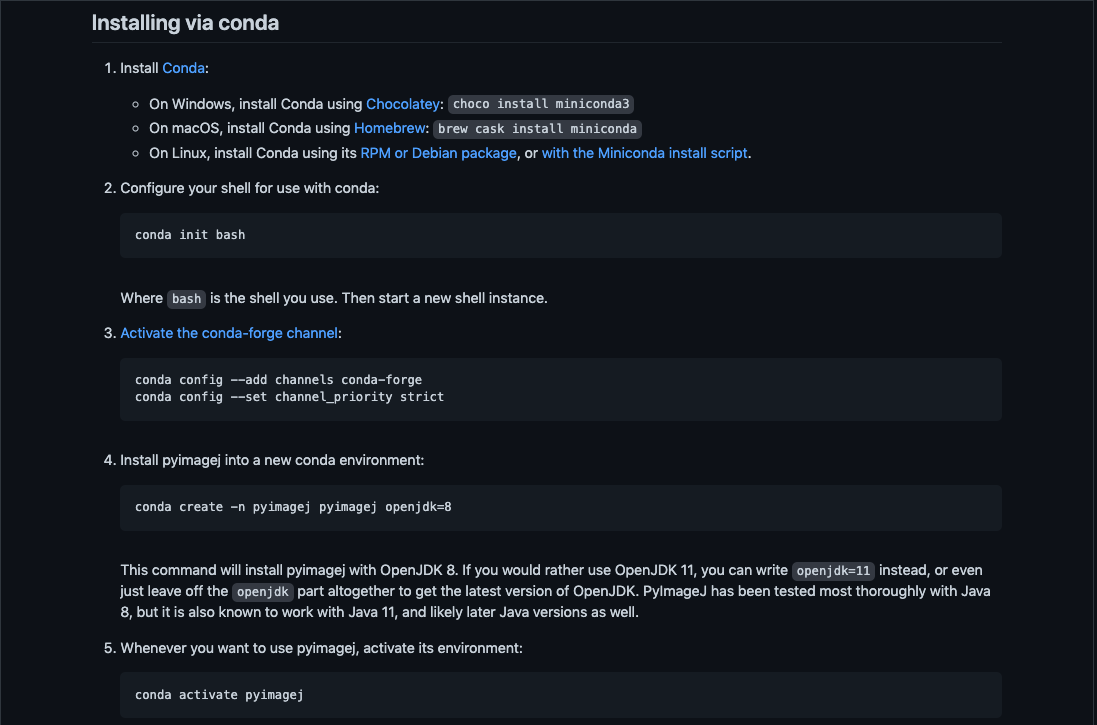

In [6]:
Image("/Users/nicolascristini/IPAN-Project/IMAGES/F01-Install_PyImageJ.png")

### Import ImageJ
Below the are three different options for the initialization of imagej in the notebook, this is shown in the example initiatlisation notebook [here](https://github.com/imagej/pyimagej/blob/master/doc/Initialization.md). The different option are also explained with multiple examples in the code snippet notebook of PyimageJ [here](https://github.com/imagej/pyimagej/blob/master/doc/PyImageJ-Code-Snippets.ipynb).
The first step is import to import and initialize imageJ. We can optionally chose to set the maximum size in bytes of the memory of the allocation pool with the *sj.config.add_options(-Xm2g)* command, in this case 2g = 2 Gygabytes. 


In [5]:
#sj.config.add_options('-Xmx2g') # <--- Set 2G memory.
import imagej
ij = imagej.init() #This line upload the LATEST online version of the software

#Print imageJ version
print("The actual version of ImageJ is:", ij.getApp().getInfo(True))

log4j:WARN No appenders could be found for logger (org.bushe.swing.event.EventService).
log4j:WARN Please initialize the log4j system properly.
log4j:WARN See http://logging.apache.org/log4j/1.2/faq.html#noconfig for more info.


The actual version of ImageJ is: ImageJ2 2.3.0/1.53f; Java 1.8.0_302 [x86_64]; 60MB of 910MB


***
***

## 00 - Introduction

### Open, save and show images
Open a LOCAL and a WEB example images with the *.io.open()* imageJ opener command. With this function we can **open** an image from the web (url) or from a a local repository (pathfile) and **save** it as a variable. Later we can **show** the image to the screen by using the show() command.

[WARNING] Expected positive value for PhysicalSizeX; got -1.5151690296E12
[java.lang.Enum.toString] [WARNING] Expected positive value for PhysicalSizeX; got -1.5151690296E12
[java.lang.Enum.toString] [WARNING] Expected positive value for PhysicalSizeY; got -1.5151690296E12
[WARNING] Expected positive value for PhysicalSizeY; got -1.5151690296E12
[WARNING] Expected positive value for PhysicalSizeX; got -1.5151690296E12
[java.lang.Enum.toString] [WARNING] Expected positive value for PhysicalSizeX; got -1.5151690296E12
[WARNING] Expected positive value for PhysicalSizeY; got -1.5151690296E12
[java.lang.Enum.toString] [WARNING] Expected positive value for PhysicalSizeY; got -1.5151690296E12
[java.lang.Enum.toString] [INFO] Populating metadata


[INFO] Populating metadata
<java class 'net.imagej.DefaultDataset'> Local Image:



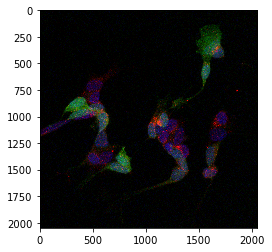

<java class 'net.imagej.DefaultDataset'> Web Image:



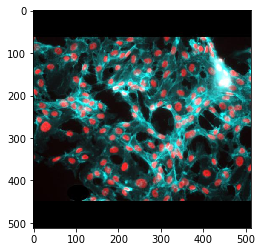

In [8]:
#Insert here the path of your local image ...
img_local = ij.io().open('/Users/nicolascristini/IPAN-Project/IMAGES/image_test.tif') 
img_web = ij.io().open('https://cildata.crbs.ucsd.edu/media/thumbnail_display/50647/50647_thumbnailx512.jpg')

print(type(img_local), "Local Image:\n")
ij.py.show(img_local)
print(type(img_web), "Web Image:\n")
ij.py.show(img_web)

Note that the previously opened images do not resulted as opened windows in ImageJ on the background.

In [10]:
print("Opened Window:",ij.window().getOpenWindows()) #There are no open windows

Opened Window: []


Images can be opened also with the *imread()* commnad from sky-kit image. We can check later that akso in this case the image is not displayed as opened window.

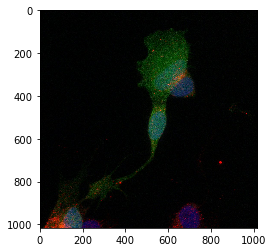

In [15]:
# import io from scikit-image
from skimage import io

# open image from local disk
img_ski_local = io.imread('/Users/nicolascristini/IPAN-Project/IMAGES/image_test2.jpg')
ij.py.show(img_ski_local)

In [16]:
print("Opened Window:",ij.window().getOpenWindows()) 

Opened Window: []


Images command can be displayed to the screen also with the Image() function from the IPython.display package. This option is used for the purpose of only displaying the picture.

***
### Run a MACRO

The MACRO consists of a series of commands that can be automatically runned on Image. The Macro must be entered as a string and then runned with the *ij.py.run_macro(macro)* function. The Macro is written with the IJmacro language.

**SAVE OUTPUT:** In the following example we run a macro that open the sample image "Blobs" and get Title and ID from the image. Those variables are retrieved from the result with the *.getOutput()* function.

[INFO] script:macro.ijm = [[Title, ID], [blobs.gif, -3.0]]
Title =  blobs.gif 
ID =  -3.0


[java.lang.Enum.toString] [INFO] script:macro.ijm = [[Title, ID], [blobs.gif, -3.0]]


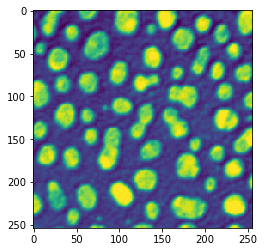

In [6]:
#MACRO: open an image, get the filename and get the Title. 
#GET Title and Id as output so that we can use it later
macro1 = """
#@output String Title
#@output String ID

run("Blobs (25K)");
Title = getTitle();
ID = getImageID();
"""

result_1 = ij.py.run_macro(macro1)
Title = result_1.getOutput('Title')
ID = result_1.getOutput('ID')
print("Title = " , Title , "\n"
      "ID = ", ID)

blobs = ij.py.active_image_plus() #Activate the opened image and show it on the screen
ij.py.show(blobs)

The blobs image is the active from the previous line. Running another macro with the command *invert* will work on blobs. It is always possible to include scripts of other languages and run them with the *ij.py.run_script(language_extension, macro)* function by specifying the language_extension = 'ijm'.

ID:  -3.0


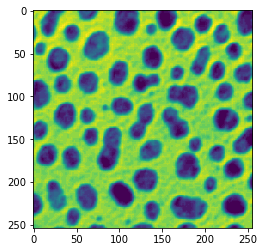

In [7]:
macro_invert = """
#@output String ID
run("Invert");
ID = getImageID()
"""
language_extension = 'ijm'
result_invert = ij.py.run_script(language_extension, macro_invert)

ID_inv = result_invert.getOutput('ID')
print("ID: ", ID_inv) 
ij.py.show(blobs)

To identify an image we can use both the Title and the ID. 
Note that: the ID is a unique negative integer for each images while, is always possible to rename an image. Moreover, there could contemporary be multiple opened images with the same Title.

We can always check the windows open in the backgrounf and then select the one we are interested in. To do that we can use the *getOpenWindows()* function.

In [8]:
print(ij.window().getOpenWindows()) 

[blobs.gif, ID]


Pay attention that the firt two images uploaded with the *.io* are not included in the opened windows. Only the one opened whitin the macro (blobs) is showed in the list. SO: If we want to run a macro an image, the image must be opened within the MACRO with the "open()" command.

By running the following macro we will open another image and make it the active image.

ID:  -4.0


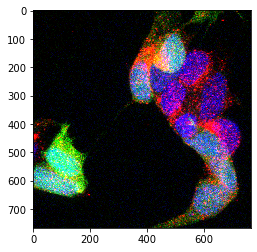

[blobs.gif, ID, ID2, image_test1.tif]


In [9]:
#PASTE THE PATH OF YOUR IMAGE INSIDE THE OPEN() COMMAND
result_2 = ij.py.run_macro("""
#@output String ID2
open("/Users/nicolascristini/IPAN-Project/IMAGES/image_test1.tif")
ID2 = getImageID()
""") 

ID2 = result_2.getOutput('ID2')
print("ID: ", ID2)

cells = ij.py.active_image_plus() #Activate the opened image and display it on screen
ij.py.show(cells)
print(ij.window().getOpenWindows()) 

The macro_invertvert will notw have effect on the last activate image: cells.

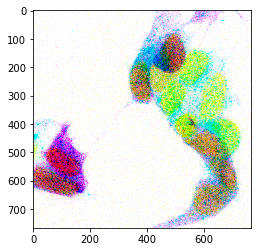

In [10]:
ij.py.run_macro(macro_invert) 
ij.py.show(cells)

In [ ]:
#Check windows
windows = ij.window().getOpenWindows()
print(windows)

**DEFINE INPUT:** With the following Macro we reactivate the "Blobs" image with the macro-command *SelectWindow()*. TO do this we can set as input the Title of the image previously saved chunk #6. We then run a pixel modifier command. Inside the Macro I included a checker string that gives me information about how the script is running.
The input variables are specified in a dictionary "arg" and specified at the beginning of the Macro.

In [11]:
print(Title)

blobs.gif


In [12]:
macro_3 = """
#@ String img_title
#@output Object checker

selectWindow(img_title);
run("Salt and Pepper");
checker = "This is the title of the analysed image: " + img_title
"""

#The dictonaire include all the variables that we want to give in input. The 
args3 = {
    'img_title' : f"{Title}",
}

result_3 = ij.py.run_macro(macro_3, args3)
print(result_3.getOutput('checker'))

[INFO] script:macro.ijm = [[checker], [This is the title of the analysed image: blobs.gif]]
This is the title of the analysed image: blobs.gif


[java.lang.Enum.toString] [INFO] script:macro.ijm = [[checker], [This is the title of the analysed image: blobs.gif]]


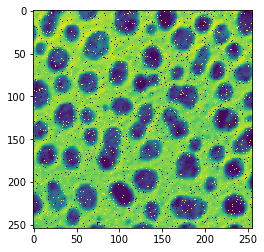

In [13]:
#Here I see the image after running the macro. Salt and pepper add some noise to the image
ij.py.show(blobs) 

We can do that same by giving as input the ID and using the command *selectImage()* inside the Macro. For make this working we need to transform the ID in an integer object. As you can see from the following chunck the ID is now a Java.string.

In [17]:
#type(ID2)
ID3 = str(-4.0)
print(ID3)

-4.0


We need to convert it into a python string and then into a python number

In [ ]:
import java
from java.lang import String

In [21]:
macro_4 = """
#@ String img_id
#@output Object checker

selectImage(img_id);
run("Salt and Pepper");
checker = "This is the title of the analysed image: " + img_id
"""

#The dictonaire include all the variables that we want to give in input. The 
args4 = {
    'img_id' : f"{ID3}",
}

result_3 = ij.py.run_macro(macro_4, args4)
print(result_3.getOutput('checker'))

None


[java.lang.Enum.toString] Macro Error: "-4.0" not found in line 5
 
selectImage ( <img_id> ) ; [java.lang.Enum.toString] 
Macro Error: "-4.0" not found in line 5
 
selectImage ( <img_id> ) ; 


Let's run a macro and save the resulting profile plot

In [7]:
directory_profile = "/Users/nicolascristini/IPAN-Project/IMAGES"
macro_profile = """
#@ String dir_out
run("Blobs");
makeLine(20, 20, 220, 220);
run("Plot Profile");
selectWindow("Plot of blobs");
saveAs(".png", dir_out + "/Blobs_plot.png");
"""
args_profile = {
    'dir_out' : f"{directory_profile}" , #Title has been previously acquired in chunck7
}

In [ ]:
result_profile = ij.py.run_macro(macro_profile, args_profile)

In [ ]:
Image(f"{directory_profile}"+"/Blobs_plot.png")

***
***
